# Session 06 - Tutorial. Data Transformation in Pandas

# 1. Let's load some libraries

In [2]:
import pandas as pd
import seaborn as sns

# 2. Let's load and concatenate some datasets

In [3]:
# similar to reading data from csv file, we can read data from excel sheets, we need to specify which column we need to read data from
# this data is a sample from comercial software Tableau
order_df=pd.read_csv('https://raw.githubusercontent.com/mosleh-exeter/BEM1025/main/sessions/Superstore.csv')

selected_columns=['Order ID', 'Order Date', 'Product ID','Segment', 'Region','Category','variable','value']

order_df_selected=order_df[selected_columns]
# or similarly you can do
order_df_selected2=pd.DataFrame(order_df,columns=selected_columns)


In [4]:
order_df_selected.head()

,Order ID,Order Date,Product ID,Segment,Region,Category,variable,value
0,CA-2013-152156,2013-11-09 00:00:00,FUR-BO-10001798,Consumer,South,Furniture,Sales,261.9600
1,CA-2013-152156,2013-11-09 00:00:00,FUR-CH-10000454,Consumer,South,Furniture,Sales,731.9400
2,CA-2013-138688,2013-06-13 00:00:00,OFF-LA-10000240,Corporate,West,Office Supplies,Sales,14.6200
3,US-2012-108966,2012-10-11 00:00:00,FUR-TA-10000577,Consumer,South,Furniture,Sales,957.5775
4,US-2012-108966,2012-10-11 00:00:00,OFF-ST-10000760,Consumer,South,Office Supplies,Sales,22.3680


In [5]:
order_df_selected['variable'].unique()

array(['Sales', 'Quantity', 'Discount', 'Profit'], dtype=object)

### Task 1. Your manager wants a report in form of a table where you show average value of different 'variable' ("Sales", "Quantity", and "Profit") for each segment

### Like the following table


<img src="https://www.dropbox.com/s/5v7pb18cusx77cy/Screenshot%202022-03-04%20at%2019.26.55.png?dl=1">


### Task 1.1 Create a dataframe where you have a column for each 'variable' namely "Sales", "Quantity", "Discount" and "Profit" 


In [6]:
#we transform the data from a long format to a wide format
order_df_pivoted=order_df_selected.pivot_table(index=['Order ID','Order Date','Product ID','Segment','Region','Category'],
                             columns='variable',
                             values='value')
#we then reset the index such that it starts from zero
order_df_pivoted=order_df_pivoted.reset_index()
order_df_pivoted

variable,Order ID,Order Date,Product ID,Segment,Region,Category,Discount,Profit,Quantity,Sales
0,CA-2011-100006,2011-09-07 00:00:00,TEC-PH-10002075,Consumer,East,Technology,0.0,109.6113,3.0,377.970
1,CA-2011-100090,2011-07-08 00:00:00,FUR-TA-10003715,Corporate,West,Furniture,0.2,-87.9354,3.0,502.488
2,CA-2011-100090,2011-07-08 00:00:00,OFF-BI-10001597,Corporate,West,Office Supplies,0.2,68.8464,6.0,196.704
3,CA-2011-100293,2011-03-14 00:00:00,OFF-PA-10000176,Home Office,South,Office Supplies,0.2,31.8696,6.0,91.056
4,CA-2011-100328,2011-01-29 00:00:00,OFF-BI-10000343,Consumer,East,Office Supplies,0.2,1.3257,1.0,3.928
...,...,...,...,...,...,...,...,...,...,...
9981,US-2014-169551,2014-07-08 00:00:00,OFF-PA-10004100,Consumer,East,Office Supplies,0.2,5.4432,3.0,15.552
9982,US-2014-169551,2014-07-08 00:00:00,OFF-ST-10004835,Consumer,East,Office Supplies,0.2,1.0044,3.0,13.392
9983,US-2014-169551,2014-07-08 00:00:00,TEC-AC-10002018,Consumer,East,Technology,0.2,4.8231,3.0,16.776
9984,US-2014-169551,2014-07-08 00:00:00,TEC-AC-10003033,Consumer,East,Technology,0.2,85.7870,2.0,527.920


### Task 1.2 Calculate the average value for'variable' namely "Sales", "Quantity", "D" and "Profit"

In [7]:
order_df_pivoted.groupby(['Segment']).mean()

variable,Discount,Profit,Quantity,Sales
Segment,,,,
Consumer,0.158163,25.820451,3.759780,223.719836
Corporate,0.158281,30.362171,3.842994,233.540115
Home Office,0.147261,33.797467,3.778121,241.107587


### Challenge yourself: Think about other approaches to create the same outcome:

### Task 2. Provide the minimum, maximum, and average for Discount for combinations of Regions and Segments

<img src="https://www.dropbox.com/s/rokpmkac1qsnt05/Screenshot%202022-03-04%20at%2019.29.27.png?dl=1">



In [40]:
order_df_pivoted.groupby(['Region','Segment'])['Discount'].agg(['min','max','mean'])

min  max      mean
Region  Segment                        
Central Consumer     0.0  0.8  0.252030
        Corporate    0.0  0.8  0.239822
        Home Office  0.0  0.8  0.208858
East    Consumer     0.0  0.7  0.147447
        Corporate    0.0  0.7  0.144521
        Home Office  0.0  0.7  0.141000
South   Consumer     0.0  0.7  0.142294
        Corporate    0.0  0.7  0.157745
        Home Office  0.0  0.7  0.144238
West    Consumer     0.0  0.7  0.107451
        Corporate    0.0  0.7  0.113958
        Home Office  0.0  0.7  0.106918

### Task 3. Your managers needs a graph for variation of Sales, Profit, Quantity, and Sales over different months



<img src="https://www.dropbox.com/s/j2j0bfynpnfxw3c/Screenshot%202022-03-04%20at%2019.55.50.png?dl=1">

### Task 3.1 Convert 'Order Date' to a datetime column

In [41]:
order_df_pivoted['date_formated']=pd.to_datetime(order_df_pivoted['Order Date'])


### Task 3.2 Find the average value for each month for Sales, Profit, Quantity, and Sales over different months

In [46]:
month_avg=order_df_pivoted.groupby(pd.Grouper(key='date_formated',freq='m')).mean()
month_avg.head()

variable,Discount,Profit,Quantity,Sales
date_formated,,,,
2011-01-31,0.126282,31.368860,3.615385,178.797808
2011-02-28,0.175532,18.419745,3.425532,102.352298
2011-03-31,0.167516,3.176624,3.726115,354.719803
2011-04-30,0.108582,26.126075,3.985075,209.059500
2011-05-31,0.155328,22.448439,3.819672,193.838418


### Task 3.3 Plot the average value for each month for Sales, Profit, Quantity, and Sales over different months

<AxesSubplot:xlabel='date_formated'>

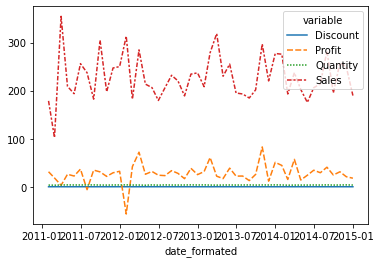

In [49]:
sns.lineplot(data=month_avg)

### Challenge yourself: Think about other approaches to create the same outcome: